In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing  
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [2]:
data =  fetch_california_housing()

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
df['MidHouseValue'] = data.target

In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MidHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MidHouseValue    0
dtype: int64

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MidHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MidHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [11]:
x = df.drop(columns = 'MidHouseValue')

In [12]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y= df['MidHouseValue']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
x_train_scaled

array([[-0.76552361, -0.68276014, -0.24143228, ..., -0.0187818 ,
         1.57238291, -0.93440215],
       [-0.90943285,  0.74600306, -0.29766225, ..., -0.06322768,
         0.52966831, -0.09536289],
       [-0.1281133 , -0.8415116 ,  0.39297118, ..., -0.02123344,
         1.27780434, -1.21408191],
       ...,
       [-0.25398114, -0.28588147, -0.38391036, ...,  0.02623197,
        -0.66734933,  0.54390513],
       [-0.73318624, -1.00026307, -0.6121478 , ..., -0.10130666,
        -1.15363775,  1.10825892],
       [-0.37383516,  0.34912439,  0.02077348, ..., -0.08342643,
        -0.22781942,  0.05945984]])

In [17]:
x_test_scaled

array([[ 4.38819461e-01, -9.20887335e-01,  1.29118277e-01, ...,
         5.81677546e-02, -7.09431986e-01,  9.78407603e-01],
       [ 3.41048193e+00, -5.24008670e-01,  9.39120597e-01, ...,
        -3.90089674e-02,  8.10219325e-01, -1.26901900e+00],
       [ 3.62133428e+00, -1.39714173e+00,  1.19255309e+00, ...,
         9.06423271e-04,  7.77488374e-01, -1.24404760e+00],
       ...,
       [ 1.80489718e-01, -1.39714173e+00, -1.05399283e-01, ...,
         8.07449835e-02, -1.13961020e+00,  1.14321889e+00],
       [ 4.88617966e-01, -1.00026307e+00,  4.21243403e-01, ...,
        -3.60879039e-02,  1.45548665e+00, -8.04550838e-01],
       [-6.91358377e-02,  6.66627326e-01, -6.06901938e-02, ...,
        -1.17128361e-01, -1.34534761e+00,  1.26308164e+00]])

In [18]:
rf_model_reg = RandomForestRegressor(n_estimators=10, criterion='squared_error', random_state=42)

In [19]:
rf_model_reg.fit(x_train_scaled,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [20]:
prediction = rf_model_reg.predict(x_test_scaled)

In [21]:
prediction 


array([1.6226  , 5.00001 , 4.993009, ..., 1.6138  , 1.6224  , 1.8206  ])

In [22]:
r2 = r2_score(y_test, prediction)
print(f"The r2-score is: {r2}")

The r2-score is: 0.7907376628750339


In [23]:
mean_squared_error(y_test, prediction)

0.28644933656741395

In [24]:
joblib.dump(rf_model_reg,"RF_Reg_Model.pkl")

['RF_Reg_Model.pkl']

In [25]:
from sklearn.tree import plot_tree

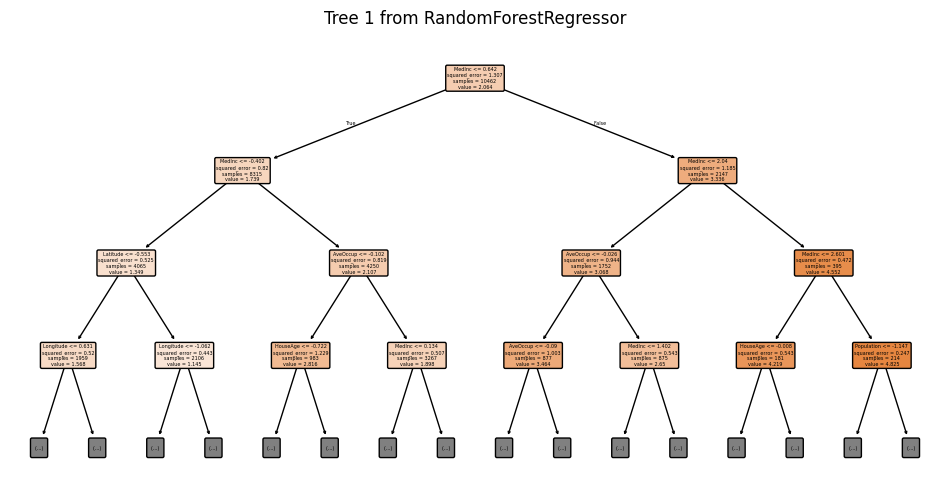

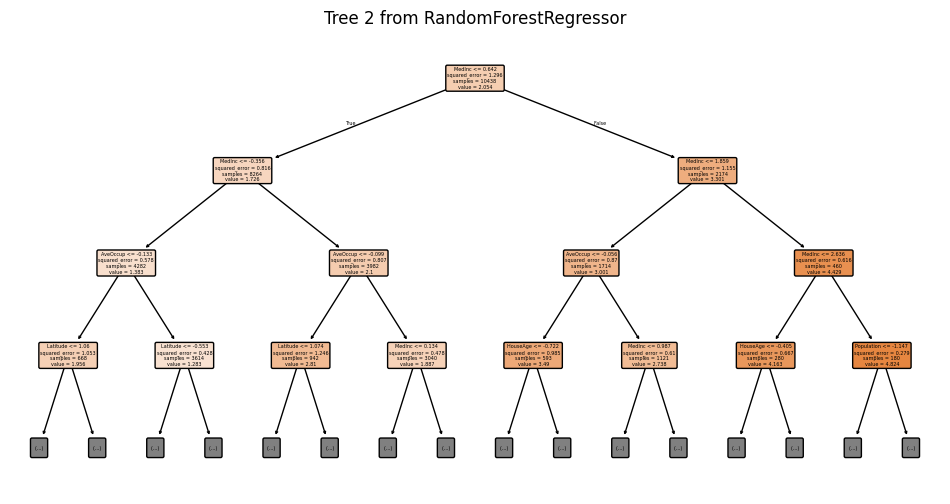

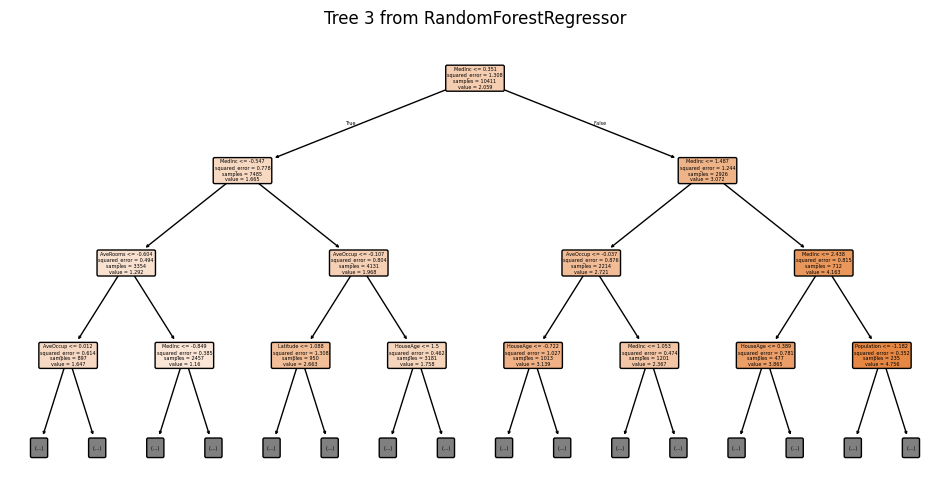

In [29]:
for i in range(min(3, len(rf_model_reg.estimators_))):
    plt.figure(figsize=(12, 6))
    plot_tree(
        rf_model_reg.estimators_[i],
        feature_names=data.feature_names,
        filled=True,
        rounded=True,
        max_depth=3  # Optional: limits visual depth
    )
    plt.title(f"Tree {i+1} from RandomForestRegressor")
    plt.show()

Support Vector Regressor 